In [1]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt

In [2]:
# Can be used to make the printing of certain objects (especially dictionaries and tuples) easier for humans.
import pprint
# Just a lazy way of supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
Graph = nx.read_edgelist('ntw.txt')

----

## 1. Graph infos

### 1.1 General

In [40]:
print('Number of nodes: {}'.format(len(Graph.nodes)))
print('Number of edges: {}'.format(len(Graph.edges)))


Number of nodes: 4039
Number of edges: 88234


In [5]:
Graph_infos = {}

In [62]:
nx.degree(Graph)['0']

347

### 1.2 Degree

In [68]:
Graph_infos['Degrees'] = dict(nx.degree(Graph))
degrees_val = [Graph_infos['Degrees'][node] for node in Graph_infos['Degrees']]

degree_min = np.min(degrees_val)
print('Min degree connection: {}'.format(degree_min))
print('')
degree_max = np.max(degrees_val)
print('Max degree connection: {}'.format(degree_max))
print('')

degree_median = np.median(degrees_val)
print('Median degree connection: {}'.format(degree_median))
print('')
degree_mean = np.mean(degrees_val)
print('Mean degree connection: {}'.format(degree_mean))
print('')

degree_u_quant = np.quantile(degrees_val,0.75)
print('75% quantile degree connection: {}'.format(degree_u_quant))
print('')
degree_l_quant = np.quantile(degrees_val,0.25)
print('25% quantile degree connection: {}'.format(degree_l_quant))
print('')

Min degree connection: 1

Max degree connection: 1045

Median degree connection: 25.0

Mean degree connection: 43.69101262688784

75% quantile degree connection: 57.0

25% quantile degree connection: 11.0



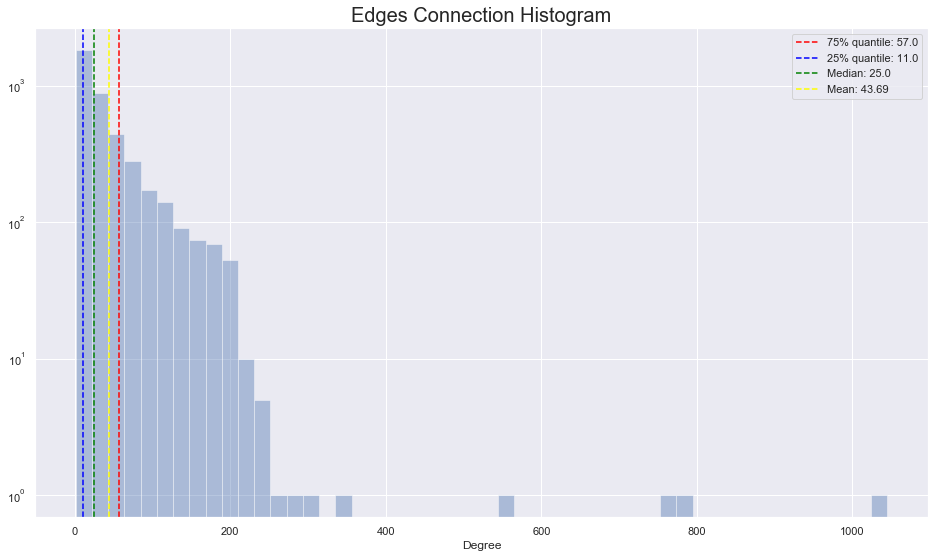

In [88]:
plt.figure(figsize=(16,9)) 
sns.set() 
 
sns.distplot(degrees_val,axlabel="Degree",kde=False)

plt.axvline(degree_u_quant, color = 'red', linestyle = '--', label = '75% quantile: {}'.format(degree_u_quant))
plt.axvline(degree_l_quant, color = 'blue', linestyle = '--', label = '25% quantile: {}'.format(degree_l_quant))
plt.axvline(degree_median, color = 'green', linestyle = '--', label = 'Median: {}'.format(degree_median))
plt.axvline(degree_mean, color = 'yellow', linestyle = '--', label = 'Mean: {}'.format(round(degree_mean,2)))
plt.legend()
plt.yscale('log')
plt.title("Edges Connection Histogram", fontsize = 20) # for histogram title
plt.legend()

### 1.3 Clustering

In [53]:
Graph_infos['Triangles'] = nx.triangles(Graph)
triangles_val = [Graph_infos['Triangles'][i] for i in Graph_infos['Triangles']]

triangles_min = np.min(triangles_val)
print('Min triangles connection from a node: {}'.format(triangles_min))
print('')
triangles_max = np.max(triangles_val)
print('Max triangles connection from a node: {}'.format(triangles_max))
print('')

triangles_median = np.median(triangles_val)
print('Median triangles connection from a node: {}'.format(triangles_median))
print('')
triangles_mean = np.mean(triangles_val)
print('Mean triangles connection from a node: {}'.format(triangles_mean))
print('')

triangles_u_quant = np.quantile(triangles_val,0.75)
print('75% quantile triangle connection from a node: {}'.format(triangles_u_quant))
print('')
triangles_l_quant = np.quantile(triangles_val,0.25)
print('25% quantile triangle connection from a node: {}'.format(triangles_l_quant))
print('')

Min triangles connection from a node: 0

Max triangles connection from a node: 30025

Median triangles connection from a node: 161.0

Mean triangles connection from a node: 1197.3334983906907

75% quantile triangle connection from a node: 831.5

25% quantile triangle connection from a node: 34.0



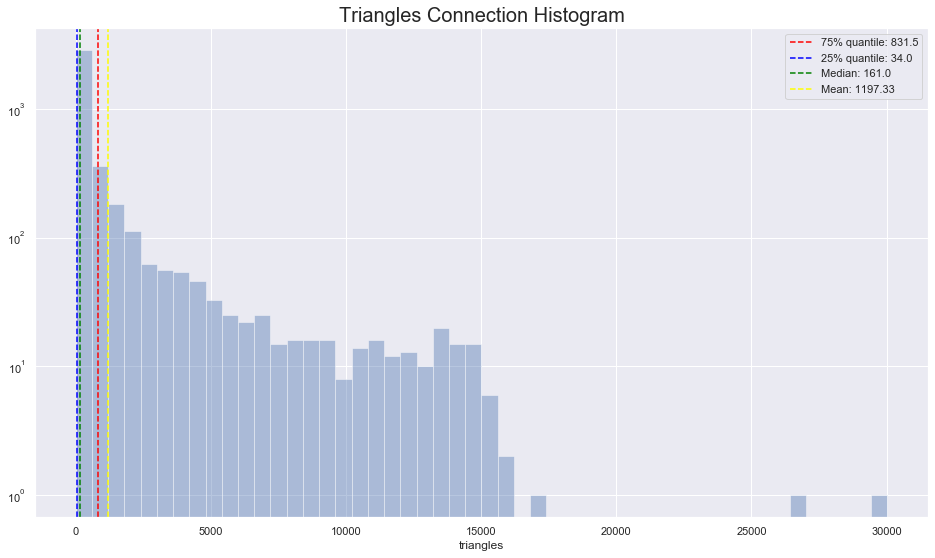

In [87]:
plt.figure(figsize=(16,9)) 
sns.set() 
 
sns.distplot(triangles_val,axlabel="triangles",kde=False)

plt.axvline(triangles_u_quant, color = 'red', linestyle = '--', label = '75% quantile: {}'.format(triangles_u_quant))
plt.axvline(triangles_l_quant, color = 'blue', linestyle = '--', label = '25% quantile: {}'.format(triangles_l_quant))
plt.axvline(triangles_median, color = 'green', linestyle = '--', label = 'Median: {}'.format(triangles_median))
plt.axvline(triangles_mean, color = 'yellow', linestyle = '--', label = 'Mean: {}'.format(round(triangles_mean,2)))
plt.legend()
plt.yscale('log')
plt.title("Triangles Connection Histogram", fontsize = 20) # for histogram title
plt.legend()

In [78]:
print('Graph transivity:  {}'.format(nx.transitivity(Graph)))
print('Averge Graph clustering:  {}'.format(nx.average_clustering(Graph)))

Graph transivity:  0.5191742775433075
Averge Graph clustering:  0.6055467186200876


## 2. Centrality

### 2.1 Degree centrality

In [8]:
Graph_centrality = {}

In [9]:
deg_cen = dict(nx.degree_centrality(Graph))


In [10]:
Graph_centrality['Degree Centrality'] = deg_cen

### 2.2 Closeness centrality

In [11]:
clo_cen = nx.closeness_centrality(Graph)


In [12]:
Graph_centrality['Closeness Centrality'] = clo_cen

### 2.3 Betweenness centrality

In [13]:
bw_cen = nx.betweenness_centrality(Graph)


In [14]:
Graph_centrality['Betweeness Centrality'] = bw_cen

### 2.4 PageRank Centrality

In [15]:
#pr_cen = nx.pagerank(Graph)
#Graph_infos['Pagerank Centrality'] = pr_cen

### 2.5 Eigenvectors

In [16]:
eig_cen = nx.eigenvector_centrality(Graph)


In [17]:
Graph_centrality['Eigenvector Centrality'] = eig_cen

## 3. Ranking

In [18]:
import operator

In [19]:
#list to dict function
def list_to_dict(a):
    d = {a[j][0]:a[j][1] for j in range(len(a)) }

    return d

In [20]:
# print top 10 nodes for given centrality measure
def top_print(name,centrality,n):
    if centrality == None:
        return None
    ranked_list = sorted(centrality.items(),key = operator.itemgetter(1),reverse = True)
    ranked_dict = list_to_dict(ranked_list)
    print(' ')
    print("CENTRALITY MEASURE BY {}".format(name.upper()))
    for k in range(0,n):
        # depends for decimals or not
        if ranked_list[k][1] > 1:
            print("{}. {} has a centrality of {:.0F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        else:
            print("{}. {} has a centrality of {:.5F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        k = k+1

### 3.1 Centralities

In [21]:
#execute function
for k in Graph_centrality:
    centrality = Graph_centrality[k]
    name = k
    top_print(name,centrality,10)

 
CENTRALITY MEASURE BY DEGREE CENTRALITY
1. 107 has a centrality of 0.25879
2. 1684 has a centrality of 0.19614
3. 1912 has a centrality of 0.18697
4. 3437 has a centrality of 0.13546
5. 0 has a centrality of 0.08593
6. 2543 has a centrality of 0.07281
7. 2347 has a centrality of 0.07207
8. 1888 has a centrality of 0.06290
9. 1800 has a centrality of 0.06067
10. 1663 has a centrality of 0.05820
 
CENTRALITY MEASURE BY CLOSENESS CENTRALITY
1. 107 has a centrality of 0.45970
2. 58 has a centrality of 0.39740
3. 428 has a centrality of 0.39484
4. 563 has a centrality of 0.39391
5. 1684 has a centrality of 0.39361
6. 171 has a centrality of 0.37049
7. 348 has a centrality of 0.36992
8. 483 has a centrality of 0.36985
9. 414 has a centrality of 0.36954
10. 376 has a centrality of 0.36656
 
CENTRALITY MEASURE BY BETWEENESS CENTRALITY
1. 107 has a centrality of 0.48052
2. 1684 has a centrality of 0.33780
3. 3437 has a centrality of 0.23612
4. 1912 has a centrality of 0.22930
5. 1085 has a ce

### 3.2 Overall ranking

In [101]:
def overall_ranking(G, G_centrality, n_top, G_infos):
    centralities = list(G_centrality.keys())
    centrality_ranked = {}
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(node))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('')
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        print
        
    return centrality_ranked, total_ranking

In [102]:
centrality_ranked,total_ranking = overall_ranking(Graph, Graph_centrality,10, Graph_infos)

OVERALL RANKING

------------------
Node: 1912

No: 1 in centrality overall ranking

Specificity:

Number of connections: 755
Number of triangles involved in: 30025

No: 3 in Degree Centrality ranking
No: 28 in Closeness Centrality ranking
No: 4 in Betweeness Centrality ranking
No: 1 in Eigenvector Centrality ranking

------------------
Node: 1577

No: 2 in centrality overall ranking

Specificity:

Number of connections: 170
Number of triangles involved in: 7006

No: 140 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 14 in Betweeness Centrality ranking
No: 246 in Eigenvector Centrality ranking

------------------
Node: 1718

No: 3 in centrality overall ranking

Specificity:

Number of connections: 155
Number of triangles involved in: 4237

No: 194 in Degree Centrality ranking
No: 23 in Closeness Centrality ranking
No: 16 in Betweeness Centrality ranking
No: 338 in Eigenvector Centrality ranking

------------------
Node: 1465

No: 4 in centrality overall ranking

## Graph drawing

In [25]:
def draw_graph_top(G,centrality_ranked,n, layout, name):
    
    plt.figure(figsize=(15,15))
    top_nodes = list(centrality_ranked.keys())[:n]
    labels = {i: i for i in top_nodes}
    colors = ['#1ECD3F', '#0C437E', '#30F77B', '#E0016D', '#E0C6F4', '#A402CF', '#6C5020', '#014F05', '#3636DE', '#0E82F6']
    big_size = 1000
    sizes = [big_size/(i+1) for i in range(n)]
    #draw 
    nx.draw_networkx(G, pos = layout, node_size = 30, with_labels = False, node_color = 'grey', edge_color = '0.7')
    
    # add bigger nodes in color
    
        
    nx.draw_networkx_nodes(G,pos=layout,nodelist= top_nodes, with_labels = True, node_color=colors, node_size = sizes)
        
    nx.draw_networkx_labels(G,layout, labels,font_size=16, font_color = 'white') 
    
    
    plt.title(name, fontsize = 20)
    plt.axis("off")

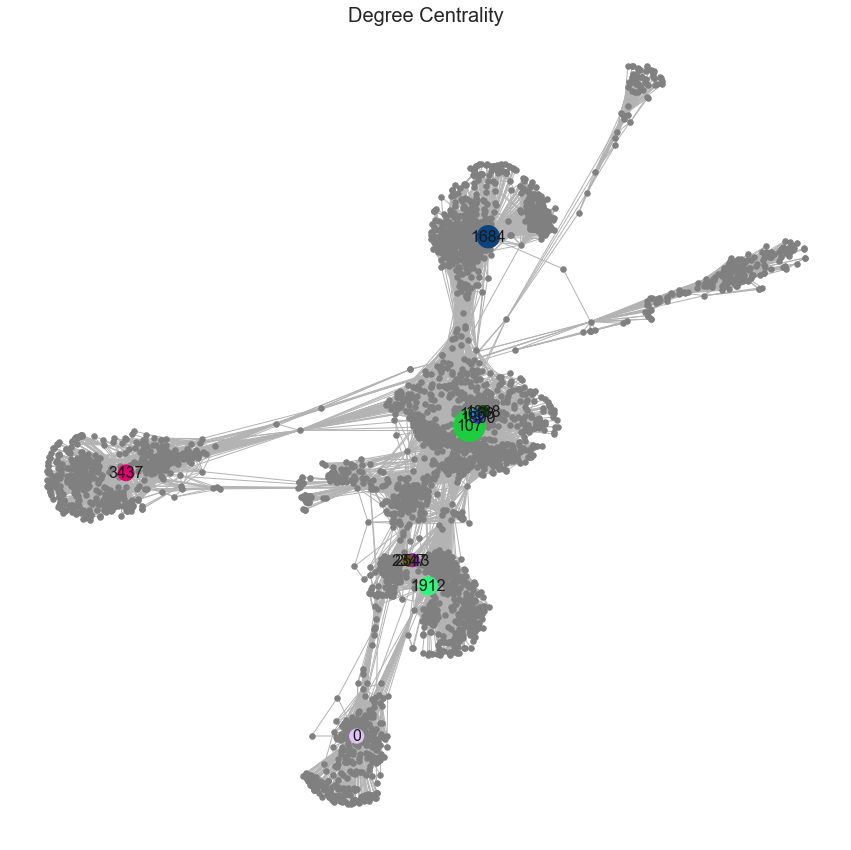

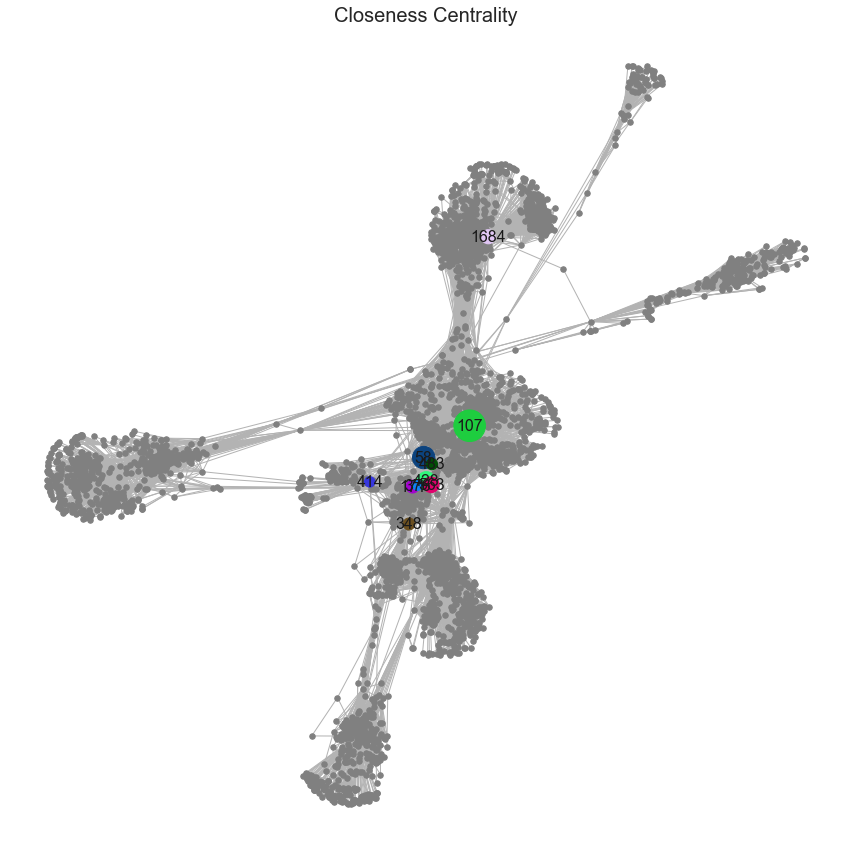

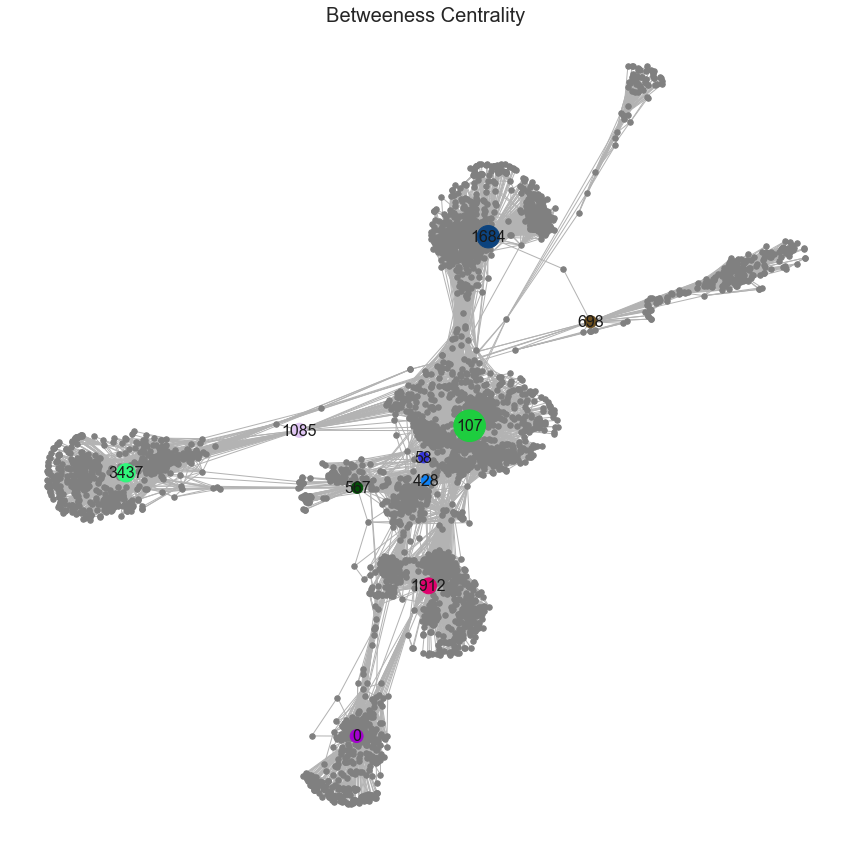

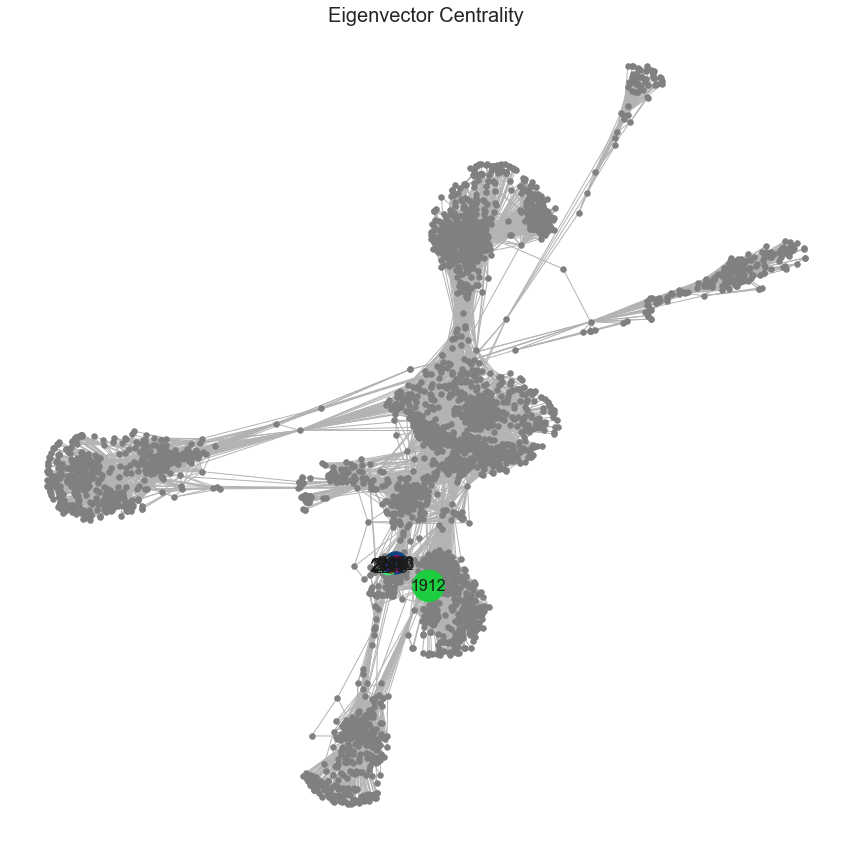

In [26]:
layout = nx.spring_layout(Graph)
for cen in Graph_centrality.keys():
    draw_graph_top(Graph,centrality_ranked[cen],10, layout, str(cen))

## 4. Community detection

In [89]:
from networkx.algorithms.community import k_clique_communities

In [90]:
!pip install python-louvain
import community


  Created wheel for python-louvain: filename=python_louvain-0.14-cp37-none-any.whl size=9298 sha256=ef48f1d9d7c2fd69b0490245a46136e7ce9a284d2db8d23f13a764dbeed30241
  Stored in directory: C:\Users\Yann\AppData\Local\pip\Cache\wheels\e7\8d\24\6b3a464bb23e96ecba3f68868e85721534fd8158a9cd7b426b
Successfully built python-louvain


'0.14'

In [91]:
partition = community.best_partition(Graph,randomize=False, random_state=0 )

In [97]:
## dictionnary with all the communities and the nodes they contain
number_of_communities = max(list(partition.values()))
communities_sorted = {}
for com in range(number_of_communities+1):
    communities_sorted[com] = [n for n in Graph.nodes if partition[n] == com]
communities_sorted

{0: ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123',
  '124',

In [111]:
nodes_ranking_community = [(total_ranking[i][0],i+1,partition[total_ranking[i][0]]) for i in range(len(total_ranking))]

In [132]:
community_overall = []
for com in communities_sorted:
    tot = [nodes_ranking_community[i][1] for i in range(len(nodes_ranking_community)) if total_ranking_community[i][2] == com]
    community_overall.append((com, np.mean(tot)))
    community_overall.sort(key=lambda tup: tup[1])

In [133]:
community_overall

[(2, 898.0782997762864),
 (9, 969.6118143459915),
 (5, 1209.7407407407406),
 (8, 1490.2191780821918),
 (3, 1497.950354609929),
 (1, 1699.860788863109),
 (6, 1714.7672413793102),
 (13, 1932.725663716814),
 (4, 2162.743925233645),
 (15, 2361.4210526315787),
 (0, 2752.8542857142857),
 (10, 2779.68),
 (14, 2909.684210526316),
 (7, 3270.2335766423357),
 (12, 3479.6019417475727),
 (11, 3762.016666666667)]

In [134]:
community_ranking = {community_overall[i][0]:i+1 for i in range(len(community_overall))}

In [144]:
print('Community Ranking')
print('------------------')
for com in community_ranking:
    print('{}. Community no: {}'.format(community_ranking[com],com))

Community Ranking
------------------
1. Community no: 2
2. Community no: 9
3. Community no: 5
4. Community no: 8
5. Community no: 3
6. Community no: 1
7. Community no: 6
8. Community no: 13
9. Community no: 4
10. Community no: 15
11. Community no: 0
12. Community no: 10
13. Community no: 14
14. Community no: 7
15. Community no: 12
16. Community no: 11


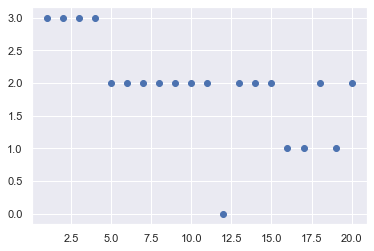

In [156]:
c = [partition[total_ranking[i][0]] for i in range(20)]
plt.scatter(x = range(1,21), y = c)

### 4.2 Overall ranking including Communities

In [141]:
def overall_ranking_w_community(G, G_centrality, n_top, G_infos, partition, community_ranking):
    centralities = list(G_centrality.keys())
    centrality_ranked = {}
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(node))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('Belongs to community {}, which is {} in community ranking'.format(partition[node],community_ranking[partition[node]]))
        print('')
        
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        
        
    

In [142]:
overall_ranking_w_community(Graph, Graph_centrality, 10, Graph_infos, partition, community_ranking)

OVERALL RANKING

------------------
Node: 1912

No: 1 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 755
Number of triangles involved in: 30025

No: 3 in Degree Centrality ranking
No: 28 in Closeness Centrality ranking
No: 4 in Betweeness Centrality ranking
No: 1 in Eigenvector Centrality ranking

------------------
Node: 1577

No: 2 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 170
Number of triangles involved in: 7006

No: 140 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 14 in Betweeness Centrality ranking
No: 246 in Eigenvector Centrality ranking

------------------
Node: 1718

No: 3 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 155
Number of triangles involved in: 4237

No: 194 in Degree Centrality ranking
No: 23 in Closeness 